In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
from rex import NSRDBX, WindX, NSRDB

## Get file from NSRDB

Following examples from notebooks here: https://github.com/NREL/hsds-examples/blob/master/notebooks/08_NREL-rex.ipynb

For more information on what data is available from the files, see the NSRDB documentation @ NREL: https://developer.nrel.gov/docs/

Actual documentation on how to use the h5py dataset object: https://docs.h5py.org/en/stable/quick.html#quick


For this to work you must first install h5pyd:

pip install --user h5pyd
Next you'll need to configure HSDS:

    `hsconfigure`
and enter at the prompt:

    hs_endpoint = https://developer.nrel.gov/api/hsds
    hs_username = None
    hs_password = None
    hs_api_key = ul1bgjdq34XTFiAN4rOh8eadBuJhUtsaEFMyWoJr

The example API key here is owned by Tom Barnhouse. If it gets disabled, get your own API key here: https://developer.nrel.gov/signup/

You can also add the above contents to a configuration file at ~/.hscfg

Or they can be passed in like as we've done below.

In [3]:
# NSRDBX is a wrapper on h5py and h5pyd that simplifies extraction of NSRDB data
# It automatically converts the meta data to a pandas DataFrame
# The time_index to a pandas DatatimeIndex
# And unscales NSRDB datasets
# NOTE: the syntax for extracting datasets is different from h5py/h5pyd!!

nsrdb_file = '/nrel/nsrdb/v3/nsrdb_2006.h5'

In [ ]:
# NSRDBX can also filter on differnt meta data columns
region = 'California'
date = '2006-06-06 12:00:00'
with NSRDBX(nsrdb_file, hsds=True) as f:
    f.region_gids(region)
    # meta = f.meta
    # ghi_map = f.get_region_df('ghi', date, region=region,region_col='state')
    # air_temp_map = f.get_timestep_map('air_temperature', date, region=region, region_col='state')
    # relative_humidity_map = f.get_timestep_map('relative_humidity', date, region=region, region_col='state')
    # cloud_optical_depth_map = f.get_timestep_map('cld_opd_dcomp', date, region=region, region_col='state')
    # cloud_effective_radius_map = f.get_timestep_map('cld_reff_dcomp', date, region=region, region_col='state')
    # cloud_type_map = f.get_timestep_map('cloud_type', date, region=region, region_col='state')

In [ ]:
meta.shape

In [ ]:
ghi_map.shape

In [ ]:
air_temp_map.shape

In [ ]:
relative_humidity_map.shape

In [ ]:
cloud_optical_depth_map.shape

In [ ]:
cloud_effective_radius_map.shape

In [ ]:
cloud_type_map.shape

## Data Sets

KeyboardInterrupt: 

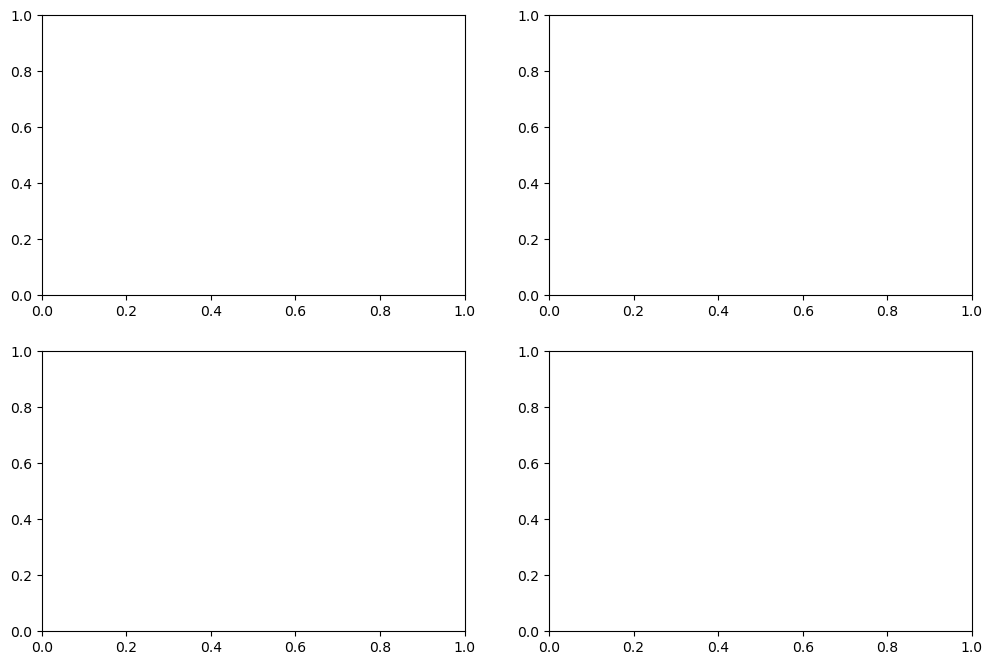

In [49]:
# Plotting the data
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1 - Global Horizontal Irradiance vs. Air Temperature
axs[0, 0].scatter(air_temp_map, ghi_map, color='blue', alpha=0.5)
axs[0, 0].set_xlabel('Air Temperature')
axs[0, 0].set_ylabel('Global Horizontal Irradiance')

# Plot 2 - Global Horizontal Irradiance vs. Relative Humidity
axs[0, 1].scatter(relative_humidity_map, ghi_map, color='green', alpha=0.5)
axs[0, 1].set_xlabel('Relative Humidity')
axs[0, 1].set_ylabel('Global Horizontal Irradiance')

# Plot 3 - Cloud Optical Depth vs. Cloud Effective Radius
axs[1, 0].scatter(cloud_optical_depth_map, cloud_effective_radius_map, color='red', alpha=0.5)
axs[1, 0].set_xlabel('Cloud Optical Depth')
axs[1, 0].set_ylabel('Cloud Effective Radius')

# Plot 4 - Cloud Type Distribution
cloud_type_counts = cloud_type_map.value_counts()
axs[1, 1].bar(cloud_type_counts.index, cloud_type_counts.values, color='purple', alpha=0.5)
axs[1, 1].set_xlabel('Cloud Type')
axs[1, 1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()